In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import glob

In [ ]:
def load_df(filename):
    cols_to_remove = [
        "done", "training_iteration", "trial_id", "date",
        "timestamp", "pid", "hostname", "node_ip", "time_since_restore",
        "time_total_s", "iterations_since_restore",
    ]
    return pd.read_csv(filename).drop(columns=cols_to_remove)

def calculate_stats(df):
    # first filter df to filter out the 9e99 numbers
    # count, mean, median, mode, range, variance, standard deviation
    stats = {}
    df = df[df['minimum'] != 9e99]
    stats['count'] = df['minimum'].count()
    stats['qor_mean'] = df['minimum'].mean()
    stats['qor_median'] = df['minimum'].median()
    stats['qor_range'] = df['minimum'].max() - df['minimum'].min()
    stats['qor_variance'] = df['minimum'].var()
    stats['qor_std'] = df['minimum'].std()
    stats['qor_q1'] = df['minimum'].quantile(0.25)
    stats['time_this_iter_s_mean'] = df['time_this_iter_s'].mean()
    stats['time_this_iter_s_median'] = df['time_this_iter_s'].median()
    stats['time_this_iter_s_range'] = df['time_this_iter_s'].max() - df['time_this_iter_s'].min()
    stats['time_this_iter_s_variance'] = df['time_this_iter_s'].var()
    stats['time_this_iter_s_std'] = df['time_this_iter_s'].std()
    stats['time_this_iter_s_q1'] = df['time_this_iter_s'].quantile(0.25)
    return stats, df

def plot(df_list, title):
    # Plot boxplot for all df, side by side with labels
    fig, ax = plt.subplots(2, figsize=(10, 10))
    for i, df in enumerate(df_list):
        ax[0].boxplot(df['minimum'], positions=[i], widths=0.6)
        ax[0].set_xticks([0, 1, 2])
        ax[0].set_xticklabels(['2.7', '2.8', '2.9'])
        ax[0].set_title('Minimum')
        ax[1].boxplot(df['time_this_iter_s'], positions=[i], widths=0.6)
        ax[1].set_xticks([0, 1, 2])
        ax[1].set_xticklabels(['2.7', '2.8', '2.9'])
        ax[1].set_title('Time this iter')

        # Set overall title
        fig.suptitle(title)
df_list = []

# Generate all the plots for the following matrix:
DATE = "20240730"
for design in ['gcd', 'aes', 'ibex']:
    for platform in ['asap7', 'sky130hd', 'ihp-sg13g2']:
        df_list = []
        q1_list = {}
        # plt.figure()
        for ray_version in ['ray27', 'ray28', 'ray29']:
            filename = f"{DATE}/{ray_version}-{design}-{platform}.csv"
            df = load_df(filename)
            stats, df = calculate_stats(df)
            print(f"Stats for {filename}")
            print(stats)
            df_list.append(df)
            q1_list[ray_version] = stats['qor_q1']
        # plot(df_list, f"{design} {platform}")
        print("-------------------")
        print(f"Q1 for {design} {platform} {q1_list}")
        print(f"Maximum Q1 value: {max(q1_list.values())}")
        print("-------------------")
        

In [ ]:
# Update: 20240809
DATE="20240809"
for design in ['gcd', 'aes', 'ibex']:
    for platform in ['asap7', 'sky130hd', 'ihp-sg13g2']:
        df_list = []
        q1_list = {}
        # plt.figure()
        for ray_version in ['ray27', 'ray28', 'ray29']:
            filename = f"{DATE}/{ray_version}-{design}-{platform}.csv"
            df = load_df(filename)
            stats, df = calculate_stats(df)
            print(f"Stats for {filename}")
            print(stats)
            df_list.append(df)
            q1_list[ray_version] = stats['qor_q1']
        # plot(df_list, f"{design} {platform}")
        print("-------------------")
        print(f"Q1 for {design} {platform} {q1_list}")
        print(f"Maximum Q1 value: {max(q1_list.values())}")
        print("-------------------")

# Analysis of improvement over time
- QoR
- FMax (WNS, Clk period)


In [ ]:
def preprocess(filename):
    cols_to_remove = [
        "done", "training_iteration", "trial_id", "date",
        "pid", "hostname", "node_ip", "time_since_restore",
        "time_total_s", "iterations_since_restore",
    ]
    df = pd.read_csv(filename).drop(columns=cols_to_remove)
    df['timestamp'] = df['timestamp'] - df['timestamp'].min()
    return df[df['minimum'] != 9e99]

def plot_qor(df, title):
    fig, ax = plt.subplots(figsize=(10, 5))
    x, y = df['timestamp'], df['minimum']
    ax.scatter(x, y)
    ax.set_title('QoR versus time')
    ax.set_xlabel('Time/s')
    ax.set_ylabel('QoR')
    ax.grid()
    ax.set_title(title)

    # Plot a linear fit
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), "r--", alpha=0.2, label=f"y={z[0]:.2f}x + {z[1]:.2f}")
    ax.legend()

# Generate all the plots for the following matrix:
DATE = "20240730"
# DATE="20240809"
for design in ['gcd', 'aes', 'ibex']:
    for platform in ['asap7', 'sky130hd', 'ihp-sg13g2']:
        plt.figure()
        for ray_version in ['ray27', 'ray28', 'ray29']:
            filename = f"{DATE}/{ray_version}-{design}-{platform}.csv"
            df = preprocess(filename)
            plot_qor(df, f"{ray_version} {design} {platform}")


20240730/ray27-gcd-asap7.csv
20240730/ray27-aes-asap7.csv
Cannot find e0167a87
Cannot find bfa8549f
Cannot find da8d3a00
Cannot find ac429d4f
Cannot find 02ce1639
Cannot find 7d4a9f8b
Cannot find 318ed21a
Cannot find 031f6e87
Cannot find 268f93c2
Cannot find a3ba12fa
Cannot find 35919eaa
Cannot find 78fe82c0
Cannot find 34286822
Cannot find ad9a60ee
Cannot find 94cf979b
Cannot find efdf1b94
Cannot find 4c6de471
Cannot find 6646464a
Cannot find e791f4c9
Cannot find c550fc6a
Cannot find f5ddf7d9
Cannot find a9727bd5
Cannot find 32d29b86
Cannot find c51ff190
Cannot find 9c866376
Cannot find f95d2c0a
Cannot find 5781b744
Cannot find f20c7dc0
Cannot find 562ce95a
Cannot find 9eb201b6
Cannot find c0deae66
Cannot find e4b0194f
Cannot find 5c7b3d94
Cannot find 66c2ac36
Cannot find 0a6dd8c8
Cannot find e02233c2
Cannot find 3b1099f3
Cannot find 38d1a8e3
Cannot find a7da5922
Cannot find a7974062
Cannot find 7b9d5168
Cannot find c8d04c0a
Cannot find 1edca520
Cannot find 345be872
Cannot find 4f9151

TypeError: expected non-empty vector for x

<Figure size 640x480 with 0 Axes>

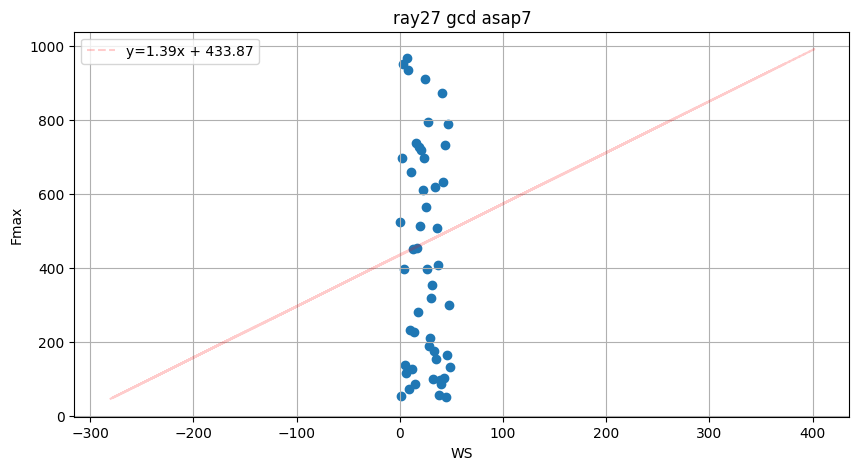

<Figure size 640x480 with 0 Axes>

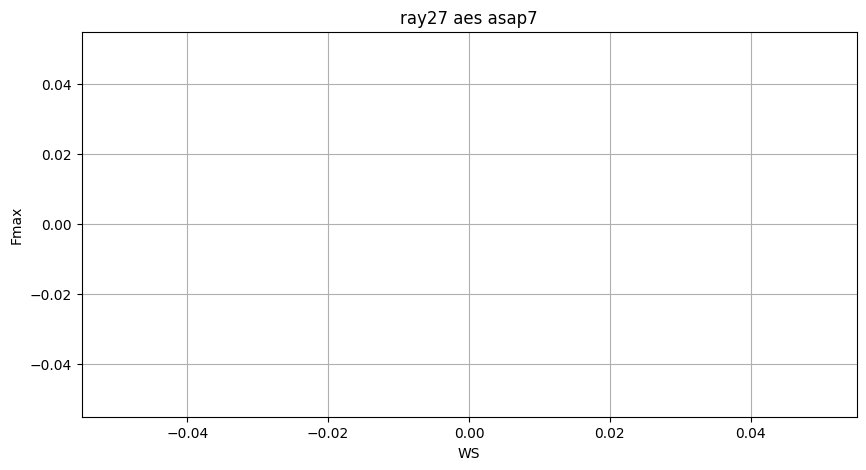

In [51]:
def preprocess_fmax(filename):
    cols_to_remove = [
        "done", "training_iteration", "date",
        "pid", "hostname", "node_ip", "time_since_restore",
        "time_total_s", "iterations_since_restore",
    ]
    df = pd.read_csv(filename).drop(columns=cols_to_remove)
    df['timestamp'] = df['timestamp'] - df['timestamp'].min()
    df = df[df['minimum'] != 9e99]

    # filter where trial_id length is 8
    trial_ids = df[df['trial_id'].apply(lambda x: len(x) == 8)].trial_id.unique()

    # filter folders that have the trial_ids
    ws_list, period_list = [], []
    for trial_id in trial_ids:
        try:
            path = glob.glob(f"../../../../../flow/logs/asap7/gcd/*/*{trial_id}-ray")[0]
        except:
            print(f"Cannot find {trial_id}")
            continue

        expt = json.load(open(f"{path}/metrics.json"))
        ws_list.append(float(expt['finish']['timing__setup__ws']))
        period_list.append(float(expt['constraints']['clocks__details'][0].replace('core_clock: ', '')))
    assert len(ws_list) == len(period_list), "Length mismatch"
    return ws_list, period_list

def plot_fmax(ws_list, period_list, title):
    fig, ax = plt.subplots(figsize=(10, 5))
    x, y = ws_list, period_list
    t = np.arange(0, len(y))
    ax.scatter(t, y)
    ax.set_title('Period versus time')
    ax.set_xlabel('time')
    ax.set_ylabel('Period')
    ax.grid()
    ax.set_title(title)

    # # Plot a linear fit
    # z = np.polyfit(x, y, 1)
    # p = np.poly1d(z)
    # ax.plot(x, p(x), "r--", alpha=0.2, label=f"y={z[0]:.2f}x + {z[1]:.2f}")
    # ax.legend()



DATE = "20240730"
# DATE="20240809"
for design in ['gcd', 'aes', 'ibex']:
    for platform in ['asap7', 'sky130hd', 'ihp-sg13g2']:
        plt.figure()
        for ray_version in ['ray27', 'ray28', 'ray29']:
            filename = f"{DATE}/{ray_version}-{design}-{platform}.csv"
            print(filename)
            ws, period = preprocess_fmax(filename)
            plot_fmax(ws, period, f"{ray_version} {design} {platform}")
            break
        break
